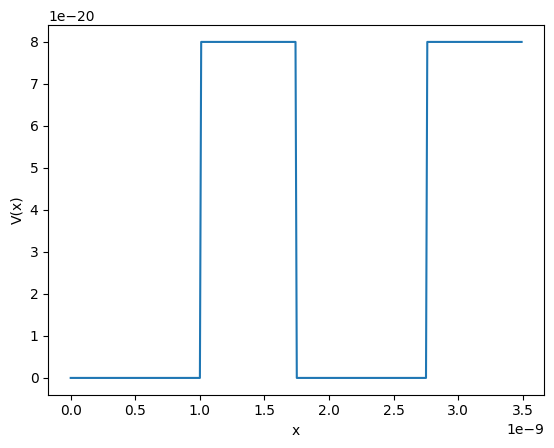

C:\Users\gstri\AppData\Local\Temp\ipykernel_85280\2310336017.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  Cqa[l]=0.5*(CSmat[0,0]+CSmat[1,1])


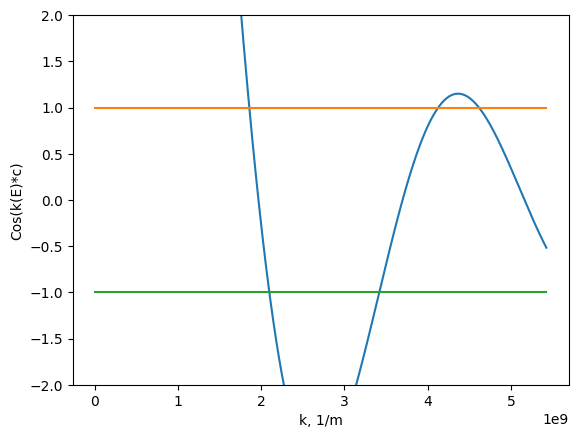

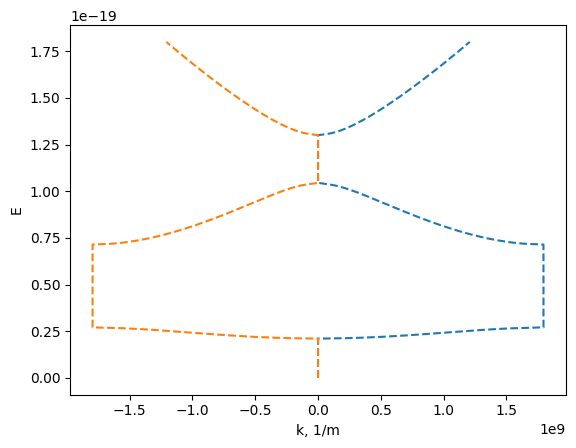

In [48]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import math
import cmath
from scipy.optimize import fsolve
from numpy import linalg as LA
import matplotlib.image as mpimg

hbar = 1.055e-34     # постоянная планка
m0 = 9.1e-31         # масса электрона
m = 1*m0             # масса электрона (коэффицент)
eV2J = 1.6e-19       # константа для перевода энергии в H
J2eV = 1/eV2J        # обратная контанта для перевода энергии
Vb=0.5*eV2J          # высота барьера
a=1.0*1e-9           # ширина барьера
c=1.75*1e-9           # постоянная решетки (период)

# дискретизация интервала
dx=0.01*1e-9
xleft=0
xright=c
xa=np.arange(xleft, xright, dx)

def kppotential(x,a,c,V):
  xtemp=x%c
  if xtemp<=a:
    return 0
  else:
    return V

Vkpxa=np.zeros(len(xa))
for i in range(len(xa)):
  Vkpxa[i]=kppotential(xa[i],a,c,Vb)

def kppotentialnp(a,c,V,dx):
  xa=np.arange(0, c, dx)
  Vkptemp=np.zeros(len(xa))
  for i in range(len(xa)):
    Vkptemp[i]=kppotential(xa[i],a,c,V)
  return Vkptemp

plt.figure()
plt.plot(np.concatenate((xa,xa+c*np.ones(len(xa))),),np.concatenate((Vkpxa,Vkpxa)))
plt.xlabel("x")
plt.ylabel("V(x)")
plt.show()

# Мы будем вычислять квазиимпульсы для интрервала энергий
kmin=0
kmax=math.sqrt(2*m*Vb)/hbar
nk=500
kmult=1.5
dk=kmult*kmax/nk
ka=np.arange(kmin+dk,kmult*kmax, dk)

Ea=[k**2*hbar**2/(2*m) for k in ka]
EaJ=[J2eV*k**2*hbar**2/(2*m) for k in ka]

Cqa=np.zeros(len(ka)) # массив для хранения cos(k(E)*c)

#цикл, в котором для каждого значения энергии вычисляется матрица монодромии
for l in range(len(ka)):
  Csolxa=np.zeros(len(xa))
  Ssolxa=np.zeros(len(xa))
  k=ka[l]
  En=Ea[l]
  #граничные значения на левой границе периода решетки для двух линейно-независимых решений (косинусо-подобное и синусо-подобное)
  Csolxa[0]=1 #условие что решение равно единице
  Csolxa[1]=1-dx**2*En/2 #условие что производная равна нулю
  Ssolxa[0]=0 #условие что решение равно нулю
  Ssolxa[1]=dx #условие что производная равна 1

  #находим численное решение с начальными условиями в виде косинуса/синуса за 1 период при заданной энергии
  for i in range(len(xa)-2):
    VEi=dx**2*(k**2-2*m*Vkpxa[i+1]/hbar**2)
    Csolxa[i+2]=2*Csolxa[i+1]-Csolxa[i]-VEi*Csolxa[i+1]
    Ssolxa[i+2]=2*Ssolxa[i+1]-Ssolxa[i]-VEi*Ssolxa[i+1]

  # составляю из двух решений и их производных в конце периода матрицу монодромии (матрицу перехода)
  CSmat=np.array([[Csolxa[-1],Ssolxa[-1]],[(Csolxa[-1]-Csolxa[-2])/dx,(Ssolxa[-1]-Ssolxa[-2])/dx]],dtype=complex)
  # косинус квазиимпульса*на период это половина следа матрицы монодромии
  Cqa[l]=0.5*(CSmat[0,0]+CSmat[1,1])

plt.figure()
plt.plot(ka,Cqa)
plt.plot([ka[0],ka[-1]],[1,1])
plt.plot([ka[0],ka[-1]],[-1,-1])
plt.xlabel("k, 1/m")
plt.ylabel("Cos(k(E)*c)")
plt.ylim([-2, 2])
plt.show()

Kna=np.zeros(len(ka),dtype=complex)

for l in range(len(ka)):
  Kna[l]= 1/c * cmath.acos(Cqa[l])

plt.figure()
plt.plot(np.real(Kna), Ea,'--')
plt.plot(-np.real(Kna), Ea,'--')
plt.xlabel("k, 1/m")
plt.ylabel("E")
plt.show()

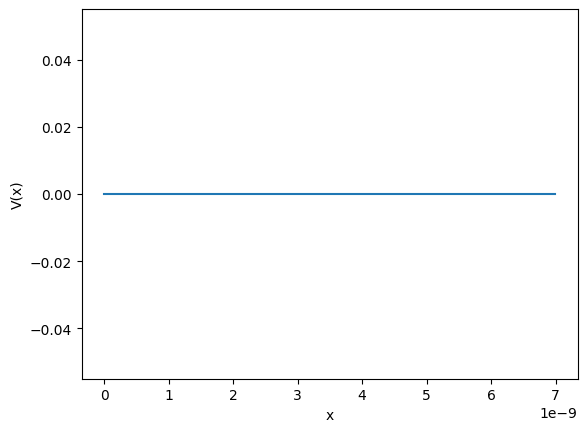

C:\Users\gstri\AppData\Local\Temp\ipykernel_85280\2258945506.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  Cqa[l]=0.5*(CSmat[0,0]+ CSmat[1,1])


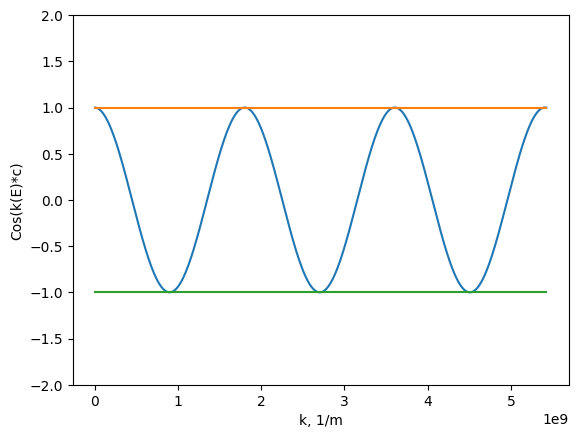

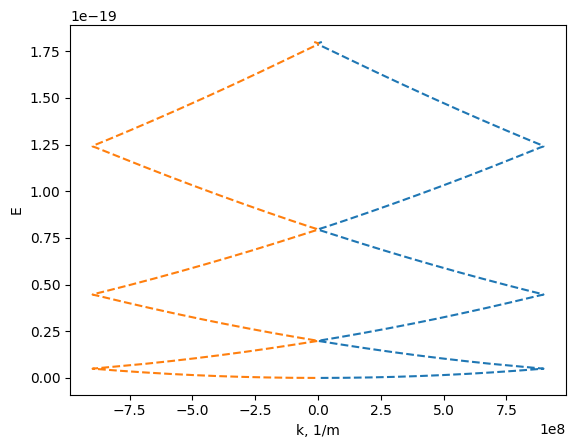

In [43]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import math  
import cmath
from scipy.optimize import fsolve
from numpy import linalg as LA
import matplotlib.image as mpimg

hbar = 1.055e-34     # постоянная планка
m0 = 9.1e-31         # масса электрона
m = 1*m0             # масса электрона (коэффицент)
eV2J = 1.6e-19       # константа для перевода энергии в H
J2eV = 1/eV2J        # обратная контанта для перевода энергии
Vb=0.5*eV2J          # высота барьера
a=4.0*1e-9           # ширина барьера
c=3.5*1e-9           # постоянная решетки (период)

# дискретизация интервала
dx=0.01*1e-9
xleft=0
xright=c
xa=np.arange(xleft, xright, dx)

def kppotential(x,a,c,V):
  xtemp=x%c
  if xtemp<=a:
    return 0
  else:
    return V

Vkpxa=np.zeros(len(xa))
for i in range(len(xa)):
  Vkpxa[i]=kppotential(xa[i],a,c,Vb)

def kppotentialnp(a,c,V,dx):
  xa=np.arange(0, c, dx)
  Vkptemp=np.zeros(len(xa))
  for i in range(len(xa)):
    Vkptemp[i]=kppotential(xa[i],a,c,V)
  return Vkptemp

plt.figure()
plt.plot(np.concatenate((xa,xa+c*np.ones(len(xa))),),np.concatenate((Vkpxa,Vkpxa)))
plt.xlabel("x")
plt.ylabel("V(x)")
plt.show()
 
# Мы будем вычислять квазиимпульсы для интрервала энергий
kmin=0
kmax=math.sqrt(2*m*Vb)/hbar
nk=500
kmult=1.5
dk=kmult*kmax/nk
ka=np.arange(kmin+dk,kmult*kmax, dk)

Ea=[k**2*hbar**2/(2*m) for k in ka]
EaJ=[J2eV*k**2*hbar**2/(2*m) for k in ka]

Cqa=np.zeros(len(ka)) # массив для хранения cos(k(E)*c)

#цикл, в котором для каждого значения энергии вычисляется матрица монодромии
for l in range(len(ka)):
  Csolxa=np.zeros(len(xa))
  Ssolxa=np.zeros(len(xa))
  k=ka[l]
  En=Ea[l]
  #граничные значения на левой границе периода решетки для двух линейно-независимых решений (косинусо-подобное и синусо-подобное)
  Csolxa[0]=1 #условие что решение равно единице
  Csolxa[1]=1-dx**2*En/2 #условие что производная равна нулю
  Ssolxa[0]=0 #условие что решение равно нулю
  Ssolxa[1]=dx #условие что производная равна 1

  #находим численное решение с начальными условиями в виде косинуса/синуса за 1 период при заданной энергии
  for i in range(len(xa)-2):
    VEi=dx**2*(k**2-2*m*Vkpxa[i+1]/hbar**2)
    Csolxa[i+2]=2*Csolxa[i+1]-Csolxa[i]-VEi*Csolxa[i+1]
    Ssolxa[i+2]=2*Ssolxa[i+1]-Ssolxa[i]-VEi*Ssolxa[i+1]

  # составляю из двух решений и их производных в конце периода матрицу монодромии (матрицу перехода)
  CSmat=np.array([[Csolxa[-1],Ssolxa[-1]],[(Csolxa[-1]-Csolxa[-2])/dx,(Ssolxa[-1]-Ssolxa[-2])/dx]],dtype=complex)
  # косинус квазиимпульса*на период это половина следа матрицы монодромии
  Cqa[l]=0.5*(CSmat[0,0]+ CSmat[1,1])

plt.figure()
plt.plot(ka,Cqa)
plt.plot([ka[0],ka[-1]],[1,1])
plt.plot([ka[0],ka[-1]],[-1,-1])
plt.xlabel("k, 1/m")
plt.ylabel("Cos(k(E)*c)")
plt.ylim([-2, 2])
plt.show()

Kna=np.zeros(len(ka),dtype=complex)

for l in range(len(ka)):
  Kna[l]= 1/c * cmath.acos(Cqa[l])

plt.figure()
plt.plot(np.real(Kna), Ea,'--')
plt.plot(-np.real(Kna), Ea,'--')
plt.xlabel("k, 1/m")
plt.ylabel("E")
plt.show()